   Year  Type of Crime  Number of Crimes
0  2000        Assault               523
1  2000       Burglary               349
2  2000        Robbery               128
3  2000  Vehicle Theft               223
4  2001        Assault               610
Missing Data:
 Year                0
Type of Crime       0
Number of Crimes    0
dtype: int64
Data Types:
 Year                 int64
Type of Crime       object
Number of Crimes     int64
dtype: object


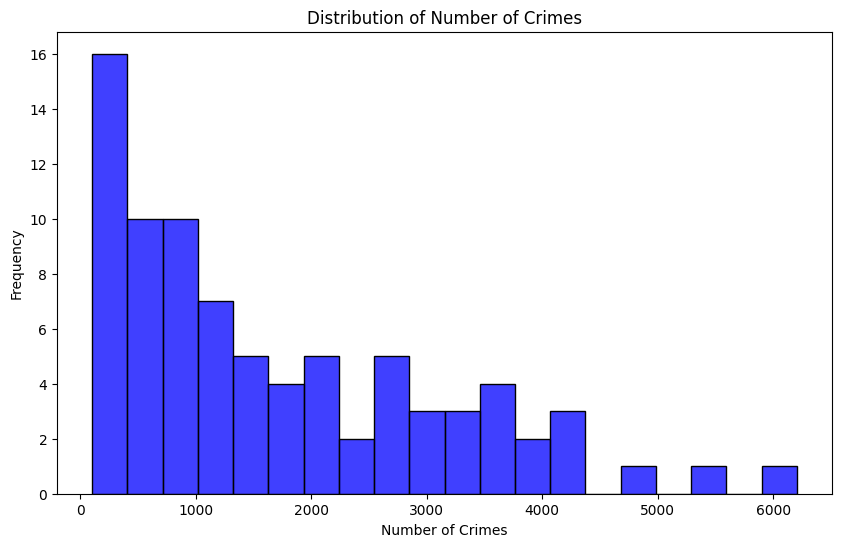

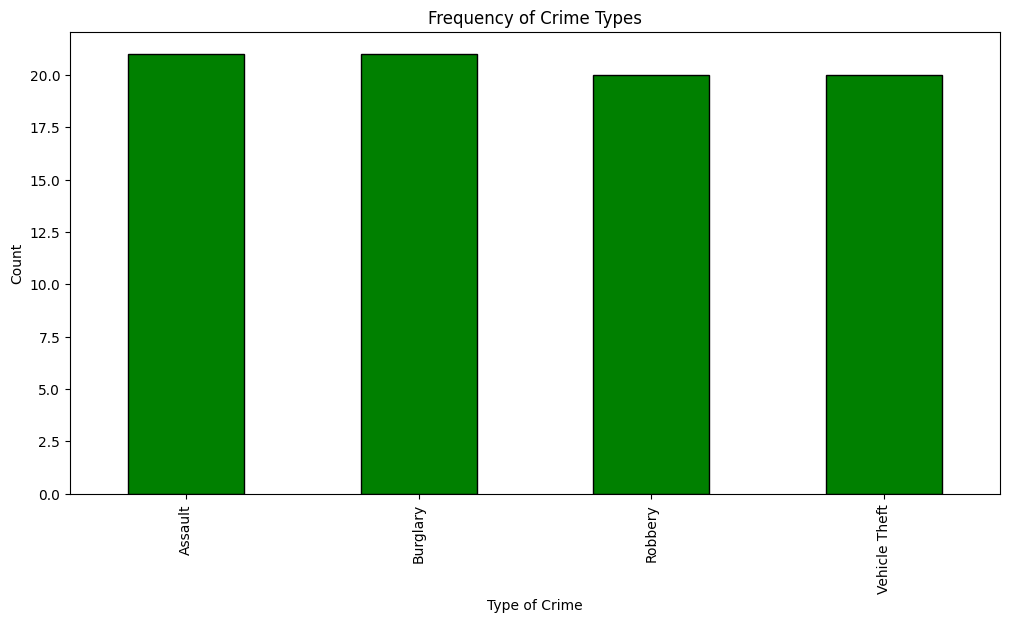

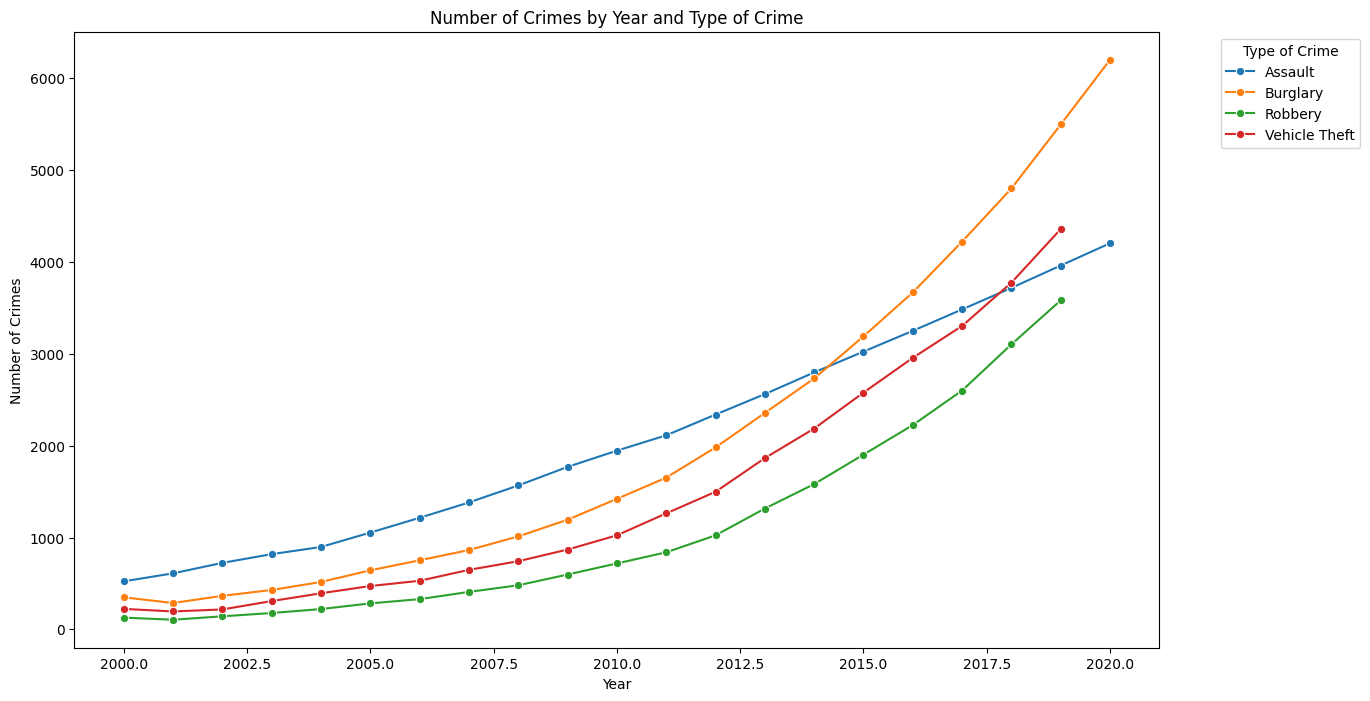

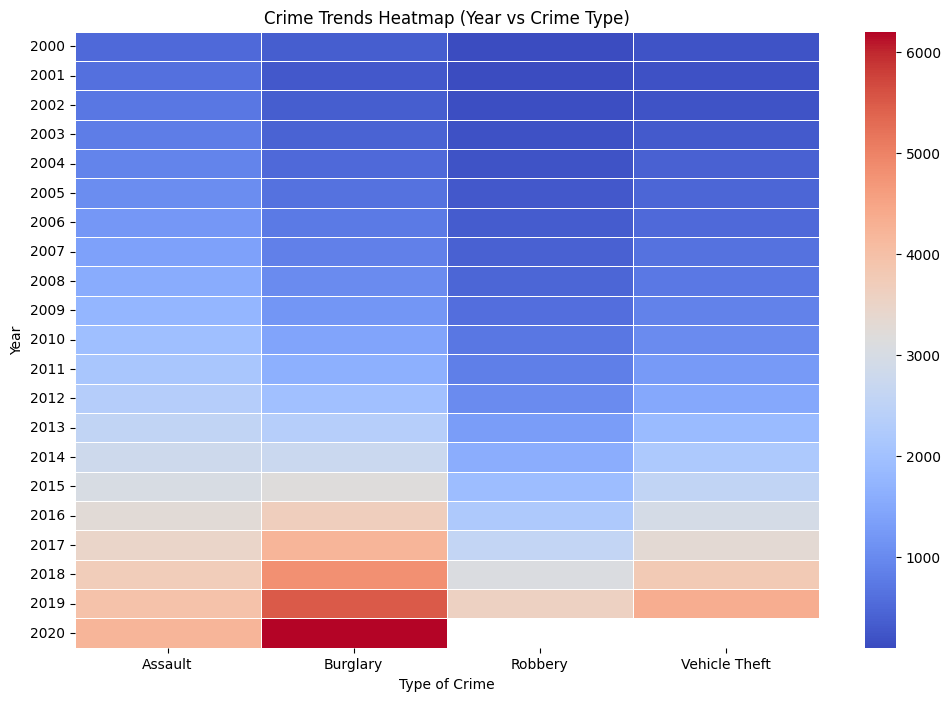

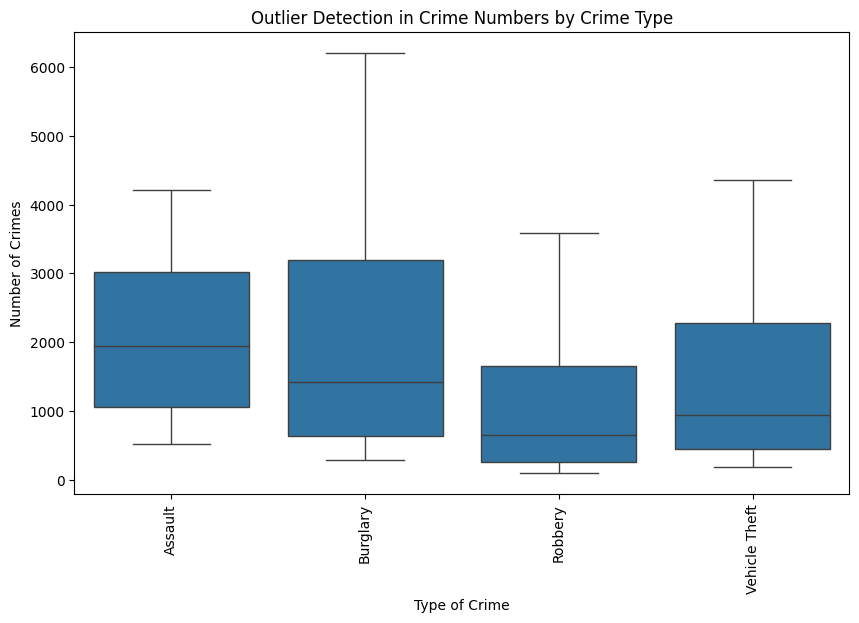

   Year  Type of Crime  Number of Crimes  Crime Rate Change
0  2000        Assault               523                NaN
1  2000       Burglary               349                NaN
2  2000        Robbery               128                NaN
3  2000  Vehicle Theft               223                NaN
4  2001        Assault               610           0.166348


In [2]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset
file_path = '/content/Crime_Statistics_2000-2020.csv'
crime_data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
print(crime_data.head())

# 3. Handle Missing Data
missing_data = crime_data.isnull().sum()
print("Missing Data:\n", missing_data)

# Since there are no missing values, no further action is required

# 4. Data Types and Conversion
print("Data Types:\n", crime_data.dtypes)

# If needed, convert data types (e.g., convert 'Year' to integer):
# crime_data['Year'] = crime_data['Year'].astype(int)

# 5. Univariate Analysis (Single Variable Analysis)

# Univariate Analysis: Number of Crimes
plt.figure(figsize=(10, 6))
sns.histplot(crime_data['Number of Crimes'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Number of Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis: Type of Crime
plt.figure(figsize=(12, 6))
crime_data['Type of Crime'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Frequency of Crime Types')
plt.xlabel('Type of Crime')
plt.ylabel('Count')
plt.show()

# 6. Bivariate Analysis (Two-Variable Analysis)

# Bivariate analysis: Crime trends over the years for each type of crime
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Number of Crimes', hue='Type of Crime', data=crime_data, marker='o')
plt.title('Number of Crimes by Year and Type of Crime')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Type of Crime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 7. Multivariate Analysis (Multiple Variables)

# Group by year and type of crime to look at multivariate trends
crime_trends = crime_data.groupby(['Year', 'Type of Crime'])['Number of Crimes'].sum().unstack()

# Plot the multivariate data as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_trends, cmap='coolwarm', linewidths=0.5, annot=False)
plt.title('Crime Trends Heatmap (Year vs Crime Type)')
plt.xlabel('Type of Crime')
plt.ylabel('Year')
plt.show()

# 8. Outlier Detection

# Outlier Detection using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=crime_data, x='Type of Crime', y='Number of Crimes')
plt.title('Outlier Detection in Crime Numbers by Crime Type')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

# 9. Feature Engineering

# Feature Engineering: Create a 'Crime Rate Change' feature
crime_data['Crime Rate Change'] = crime_data.groupby('Type of Crime')['Number of Crimes'].pct_change()

# Preview the data with the new feature
print(crime_data.head())
